In [4]:
from micrograd import Neuron, Value
import matplotlib.pyplot as plt
import mnist_loader  # noqa
import torch
import random
import torch.nn as nn  # noqa

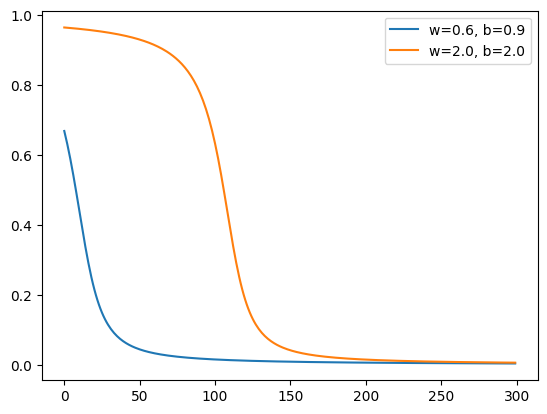

In [4]:
# We are inputting 1 and want an output of 0

for w, b in [(0.6, 0.9), (2.0, 2.0)]:
    neuron = Neuron(1)
    neuron.w = [Value(w)]
    neuron.b = Value(b)

    losses = []
    for i in range(300):
        pred = neuron([1.0])
        loss = (pred - Value(0)) ** 2
        losses.append(loss.data)
        for p in neuron.parameters():
            p.grad = 0
        loss.backward()
        for p in neuron.parameters():
            p.data = p.data - 0.15 * p.grad

    # Add label
    plt.plot(losses, label=f"w={w}, b={b}")

# Display legend
plt.legend()

We can see that the neuron learns very slowly in the beginning, when predicted output and actual output are the furthest apart. That shouldn't be the case. The model should learn _faster_ the further away our predictions are from the actual value. We can use cross-entropy loss to remedy this.


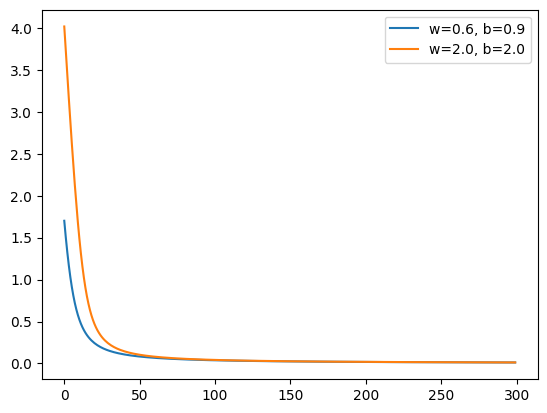

In [5]:
# We are inputting 1 and want an output of 0
for w, b in [(0.6, 0.9), (2.0, 2.0)]:
    neuron = Neuron(1)
    neuron.w = [Value(w)]
    neuron.b = Value(b)

    losses = []
    for i in range(300):
        pred = neuron([1.0])
        # Log loss
        loss = -Value(0) * pred.log() - (1 - Value(0)) * (1 - pred).log()
        losses.append(loss.data)
        for p in neuron.parameters():
            p.grad = 0
        loss.backward()
        for p in neuron.parameters():
            p.data = p.data - 0.15 * p.grad

    # Add label
    plt.plot(losses, label=f"w={w}, b={b}")

# Display legend
plt.legend()

We can see that the problem faced earlier has been fixed.


### Regularization

Next, we try running some experiments in pytorch to test the effects of regularization.


In [6]:
import network2

In [5]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
# Convert zip iterators to lists
training_data = list(training_data)
validation_data = list(validation_data)
test_data = list(test_data)

In [7]:
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
net.SGD(
    training_data[:1000],
    400,
    10,
    0.5,
    evaluation_data=test_data,
    monitor_evaluation_accuracy=True,
    monitor_training_cost=True,
)

Epoch 0 training complete
Cost on training data: 1.9157265803666599
Accuracy on evaluation data: 5336 / 10000
Epoch 1 training complete
Cost on training data: 1.4233085154513578
Accuracy on evaluation data: 6481 / 10000
Epoch 2 training complete
Cost on training data: 1.140610742579291
Accuracy on evaluation data: 7009 / 10000
Epoch 3 training complete
Cost on training data: 0.9673757700312096
Accuracy on evaluation data: 7278 / 10000
Epoch 4 training complete
Cost on training data: 0.8219014211106735
Accuracy on evaluation data: 7518 / 10000
Epoch 5 training complete
Cost on training data: 0.7009795108242491
Accuracy on evaluation data: 7621 / 10000
Epoch 6 training complete
Cost on training data: 0.6210731479476688
Accuracy on evaluation data: 7749 / 10000
Epoch 7 training complete
Cost on training data: 0.5649499666413196
Accuracy on evaluation data: 7741 / 10000
Epoch 8 training complete
Cost on training data: 0.4967537573921582
Accuracy on evaluation data: 7913 / 10000
Epoch 9 tra

([],
 [5336,
  6481,
  7009,
  7278,
  7518,
  7621,
  7749,
  7741,
  7913,
  7890,
  7977,
  7938,
  7913,
  8051,
  8115,
  8133,
  8096,
  8108,
  8138,
  8127,
  8145,
  8126,
  8127,
  8159,
  8160,
  8176,
  8163,
  8185,
  8192,
  8190,
  8187,
  8204,
  8208,
  8180,
  8193,
  8206,
  8207,
  8198,
  8223,
  8217,
  8211,
  8221,
  8218,
  8236,
  8215,
  8232,
  8220,
  8228,
  8224,
  8224,
  8236,
  8220,
  8222,
  8232,
  8231,
  8236,
  8231,
  8234,
  8225,
  8232,
  8228,
  8234,
  8234,
  8241,
  8233,
  8234,
  8224,
  8234,
  8233,
  8235,
  8238,
  8241,
  8235,
  8237,
  8241,
  8235,
  8245,
  8236,
  8246,
  8244,
  8250,
  8242,
  8240,
  8243,
  8248,
  8247,
  8253,
  8251,
  8245,
  8255,
  8248,
  8236,
  8246,
  8248,
  8243,
  8240,
  8254,
  8247,
  8247,
  8243,
  8246,
  8241,
  8249,
  8235,
  8239,
  8240,
  8253,
  8246,
  8245,
  8243,
  8248,
  8249,
  8244,
  8255,
  8250,
  8253,
  8253,
  8254,
  8245,
  8245,
  8253,
  8248,
  8256,
  8256,
  8

In [6]:
class VanillaMNIST(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(784, 30), nn.Sigmoid(), nn.Linear(30, 10), nn.Sigmoid()
        )

    def forward(self, x):
        return self.linear(x)

In [31]:
# Training loop
training_data = training_data[:1000]
evaluation_data = test_data

n = len(training_data)
epochs = 400
mini_batch_size = 10
alpha = 0.5
model = VanillaMNIST()

costs = []
accuracies = []

# Experiment: comparing regularized and non-regularized models
for j in range(epochs):
    random.shuffle(training_data)
    mini_batches = [
        training_data[k : k + mini_batch_size] for k in range(0, n, mini_batch_size)
    ]
    epoch_loss = 0
    for mini_batch in mini_batches:
        total_loss = torch.tensor([0.0])
        for x, y in mini_batch:
            x = torch.tensor(x).squeeze(1)
            y = torch.tensor(y).squeeze(1)

            # Calculate log loss and add to loss
            y_hat = model(x)
            loss = y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat)
            total_loss += sum(loss)

        log_loss = -(1 / len(mini_batch)) * total_loss
        model.zero_grad()
        log_loss.backward()
        for p in model.parameters():
            p.data = p.data - alpha * p.grad
        epoch_loss += log_loss.item()

    # Evaluate model on evaluation_data
    correct = 0
    for x, y in evaluation_data:
        x = torch.tensor(x).squeeze(1)
        y_hat = model(x)
        if torch.argmax(y_hat) == y:
            correct += 1

    costs.append(epoch_loss / len(mini_batches))
    accuracies.append(correct / len(evaluation_data))
    print(
        f"Epoch {j}, Loss: {epoch_loss / len(mini_batches)}, Accuracy: {correct/len(evaluation_data)}"
    )

Epoch 0, Loss: 2.4531275963783266, Accuracy: 0.7109
Epoch 1, Loss: 1.2405188855528833, Accuracy: 0.8002
Epoch 2, Loss: 0.8996775972843171, Accuracy: 0.8283
Epoch 3, Loss: 0.6996856625378132, Accuracy: 0.8622
Epoch 4, Loss: 0.5463169002532959, Accuracy: 0.8649
Epoch 5, Loss: 0.46642671793699264, Accuracy: 0.874
Epoch 6, Loss: 0.3940893569588661, Accuracy: 0.8774
Epoch 7, Loss: 0.31663369677960873, Accuracy: 0.8706
Epoch 8, Loss: 0.26746165841817854, Accuracy: 0.8696
Epoch 9, Loss: 0.22563948720693588, Accuracy: 0.8668
Epoch 10, Loss: 0.1941769213229418, Accuracy: 0.8728
Epoch 11, Loss: 0.16567592516541482, Accuracy: 0.8714
Epoch 12, Loss: 0.14149875968694686, Accuracy: 0.8695
Epoch 13, Loss: 0.12648260202258826, Accuracy: 0.8735
Epoch 14, Loss: 0.11159584682434798, Accuracy: 0.8771
Epoch 15, Loss: 0.10187144234776496, Accuracy: 0.8752
Epoch 16, Loss: 0.090857108309865, Accuracy: 0.8723
Epoch 17, Loss: 0.0825225205719471, Accuracy: 0.8732
Epoch 18, Loss: 0.07501107199117542, Accuracy: 0.

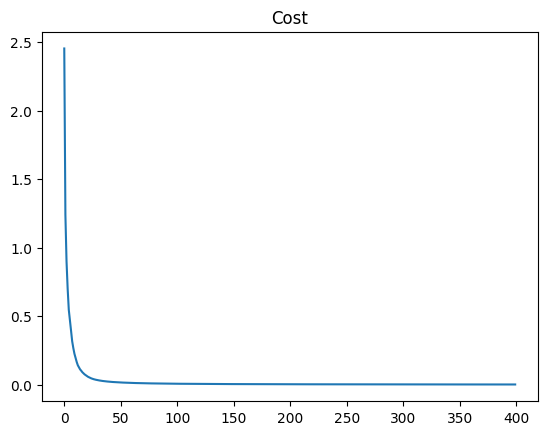

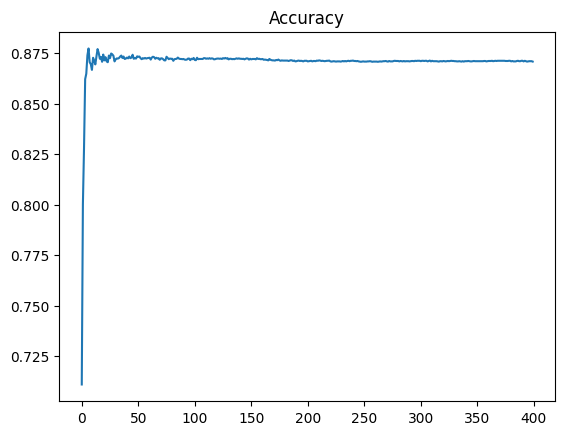

In [32]:
plt.plot(costs, label="Cost")
plt.title("Cost")
plt.show()
plt.plot(accuracies, label="Accuracy")
plt.title("Accuracy")
plt.show()

We can see that the accuracy plateaus after a certain point even though costs seems to keep going down.


In [27]:
# Training loop
training_data = training_data[:1000]
evaluation_data = test_data

n = len(training_data)
epochs = 100
mini_batch_size = 10
alpha = 0.5
lambd = 0.1
model = VanillaMNIST()

costs = []
accuracies = []

# Experiment: comparing regularized and non-regularized models
for j in range(epochs):
    random.shuffle(training_data)
    mini_batches = [
        training_data[k : k + mini_batch_size] for k in range(0, n, mini_batch_size)
    ]
    epoch_loss = 0
    for mini_batch in mini_batches:
        total_loss = torch.tensor([0.0])
        for x, y in mini_batch:
            x = torch.tensor(x).squeeze(1)
            y = torch.tensor(y).squeeze(1)

            # Calculate log loss and add to loss
            y_hat = model(x)
            loss = y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat)
            total_loss += sum(loss)

        m = len(mini_batch)
        l2_reg = sum((p**2).sum() for p in model.parameters())
        log_loss = -(1 / m) * total_loss + (lambd / (2 * m)) * l2_reg
        model.zero_grad()
        log_loss.backward()
        for p in model.parameters():
            p.data = p.data - alpha * p.grad
        epoch_loss += log_loss.item()

    # Evaluate model on evaluation_data
    correct = 0
    for x, y in evaluation_data:
        x = torch.tensor(x).squeeze(1)
        y_hat = model(x)
        if torch.argmax(y_hat) == y:
            correct += 1

    costs.append(epoch_loss / len(mini_batches))
    accuracies.append(correct / len(evaluation_data))
    print(
        f"Epoch {j}, Loss: {epoch_loss / len(mini_batches)}, Accuracy: {correct/len(evaluation_data)}"
    )

Epoch 0, Loss: 2.811732646226883, Accuracy: 0.688
Epoch 1, Loss: 2.098552111387253, Accuracy: 0.7897
Epoch 2, Loss: 1.9765801417827606, Accuracy: 0.806
Epoch 3, Loss: 1.9365905106067658, Accuracy: 0.8352
Epoch 4, Loss: 1.9170798242092133, Accuracy: 0.8167
Epoch 5, Loss: 1.910514018535614, Accuracy: 0.82
Epoch 6, Loss: 1.8914796423912048, Accuracy: 0.8404
Epoch 7, Loss: 1.8967450559139252, Accuracy: 0.8208
Epoch 8, Loss: 1.8929740846157075, Accuracy: 0.7972
Epoch 9, Loss: 1.884774169921875, Accuracy: 0.8036
Epoch 10, Loss: 1.8786686623096467, Accuracy: 0.8362
Epoch 11, Loss: 1.8796998131275178, Accuracy: 0.8405
Epoch 12, Loss: 1.8953367912769317, Accuracy: 0.7959
Epoch 13, Loss: 1.8880756640434264, Accuracy: 0.8247
Epoch 14, Loss: 1.8752827227115632, Accuracy: 0.7868
Epoch 15, Loss: 1.8846649825572968, Accuracy: 0.8347
Epoch 16, Loss: 1.8643178629875183, Accuracy: 0.8252
Epoch 17, Loss: 1.8734481954574584, Accuracy: 0.8158
Epoch 18, Loss: 1.882199420928955, Accuracy: 0.8237
Epoch 19, Lo

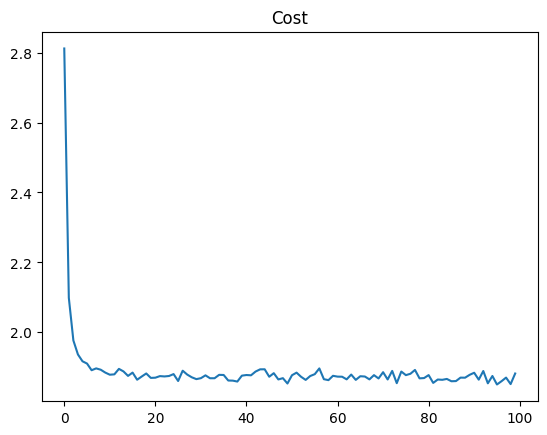

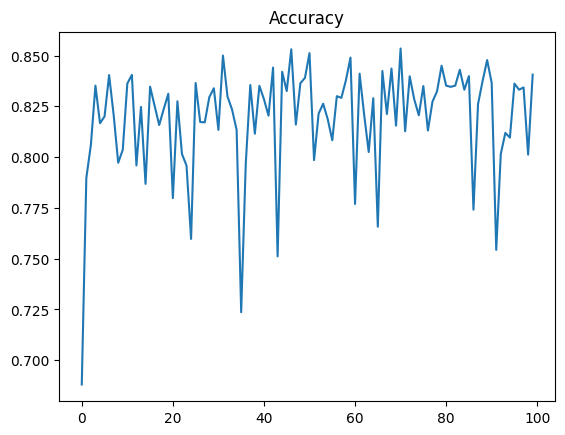

In [28]:
plt.plot(costs, label="Cost")
plt.title("Cost")
plt.show()
plt.plot(accuracies, label="Accuracy")
plt.title("Accuracy")
plt.show()

Regularization doesn't seem to be working. Need to figure out what's going wrong.
